In [112]:
import torch

In [123]:
# expl_method = "GradCAM"
expl_method = 'LayerXAct'
# expl_method = 'LayerDL'
# transform = False
# transform = True
transform = ['spatial']
# transform = ['spatial', 'noise', 'color']
# transform = None
tester = "ConfAOPC"
# tester = "OrigAOPC"
seed = 0
mode = "insertion"

In [124]:
total_results = []

for i in range(0, 10, 1):
    log_name = f"./aopc_results/{tester}_transform_{transform}_mode_{mode}_expl_method_{expl_method}_seed_{seed}_batch_num_{i}.pt"
    print(log_name)
    try:
        log = torch.load(log_name)
        total_results.append(log)
    except:
        continue

print(total_results)
total_results = torch.stack(total_results)

./aopc_results/ConfAOPC_transform_['spatial']_mode_insertion_expl_method_LayerXAct_seed_0_batch_num_0.pt
./aopc_results/ConfAOPC_transform_['spatial']_mode_insertion_expl_method_LayerXAct_seed_0_batch_num_1.pt
./aopc_results/ConfAOPC_transform_['spatial']_mode_insertion_expl_method_LayerXAct_seed_0_batch_num_2.pt
./aopc_results/ConfAOPC_transform_['spatial']_mode_insertion_expl_method_LayerXAct_seed_0_batch_num_3.pt
./aopc_results/ConfAOPC_transform_['spatial']_mode_insertion_expl_method_LayerXAct_seed_0_batch_num_4.pt
./aopc_results/ConfAOPC_transform_['spatial']_mode_insertion_expl_method_LayerXAct_seed_0_batch_num_5.pt
./aopc_results/ConfAOPC_transform_['spatial']_mode_insertion_expl_method_LayerXAct_seed_0_batch_num_6.pt
./aopc_results/ConfAOPC_transform_['spatial']_mode_insertion_expl_method_LayerXAct_seed_0_batch_num_7.pt
./aopc_results/ConfAOPC_transform_['spatial']_mode_insertion_expl_method_LayerXAct_seed_0_batch_num_8.pt
./aopc_results/ConfAOPC_transform_['spatial']_mode_inse

In [125]:
total_results = total_results.mean(0)

In [126]:
total_results

tensor([[0.0011, 0.0050, 0.0170, 0.0285, 0.0467, 0.0651, 0.0886, 0.1158, 0.1402,
         0.1730, 0.2016, 0.2275, 0.2559, 0.2825, 0.3126, 0.3437, 0.3742, 0.3968,
         0.4233, 0.4457, 0.4666],
        [0.0011, 0.0054, 0.0170, 0.0296, 0.0465, 0.0661, 0.0874, 0.1171, 0.1447,
         0.1717, 0.1988, 0.2320, 0.2562, 0.2842, 0.3129, 0.3431, 0.3698, 0.3878,
         0.4101, 0.4286, 0.4395]])

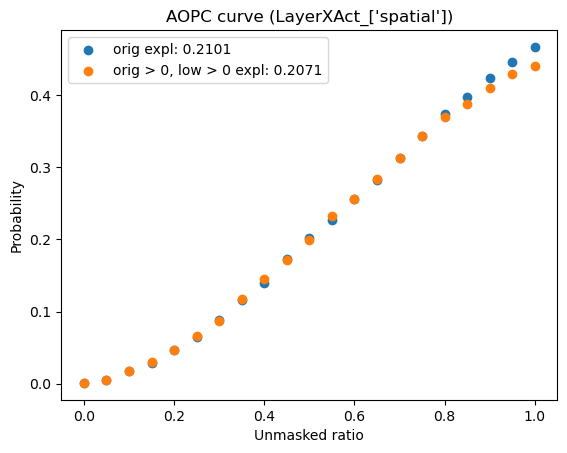

tensor(0.2101) tensor(0.2071)


In [127]:
import matplotlib.pyplot as plt
import numpy as np

if tester == "OrigAOPC":
    plt.scatter(np.arange(0, 1, 0.05), total_results[0], label = f"orig expl: {total_results[0].mean():.4f}")
    plt.scatter(np.arange(0, 1, 0.05), total_results[1], label = f"conf_high expl: {total_results[1].mean():.4f}")
    plt.scatter(np.arange(0, 1, 0.05), total_results[2], label = f"conf_low expl: {total_results[2].mean():.4f}")
elif tester == "ConfAOPC":
    plt.scatter(np.arange(0, 1.05, 0.05), total_results[0], label = f"orig expl: {total_results[0].mean():.4f}")
    plt.scatter(np.arange(0, 1.05, 0.05), total_results[1], label = f"orig > 0, low > 0 expl: {total_results[1].mean():.4f}")
    
plt.legend()
plt.title(f"AOPC curve ({expl_method}_{transform})")
plt.xlabel("Unmasked ratio")
plt.ylabel("Probability")

plt.show()

print(total_results[0].mean(), total_results[1].mean())

